In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [60]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
print(pd.__version__)

0.22.0


In [3]:
df = pd.read_csv('AAPL.csv', header = 0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
1,2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2,2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
3,2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
4,2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900


In [18]:
## Converting into typical time series data, where the index is the date
ts = pd.read_csv('AAPL.csv', header = 0, parse_dates = ['Date'], index_col = "Date")
ts.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900


In [20]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
ts.index.min()

Timestamp('2016-06-06 00:00:00')

In [22]:
ts.index.max()

Timestamp('2018-06-04 00:00:00')

In [25]:
ts['2016-06'].Close.mean()

96.39947384210528

In [38]:
# retrive the stock price at any given date
ts.index

DatetimeIndex(['2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-10', '2016-06-13', '2016-06-14', '2016-06-15',
               '2016-06-16', '2016-06-17',
               ...
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-04'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

In [46]:
ts["2017-01-01":"2017-02-01"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,113.410263,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,113.283333,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,113.859421,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,115.128761,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,116.183273,33561900
2017-01-10,118.769997,119.379997,118.300003,119.110001,116.300438,24462100
2017-01-11,118.739998,119.930000,118.599998,119.750000,116.925346,27588600
2017-01-12,118.900002,119.300003,118.209999,119.250000,116.437141,27086200
2017-01-13,119.110001,119.620003,118.809998,119.040001,116.232101,26111900


## Resampling the daily data into montly stock prices

In [55]:
montly_data = ts.resample('M')
montly_data.mean()[:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-30,96.344211,97.308422,95.732105,96.399474,93.140262,3.587515e+07
2016-07-31,98.450999,99.164000,98.002500,98.556500,95.224357,3.428898e+07
2016-08-31,107.463044,108.140435,106.986522,107.665218,104.516657,2.739689e+07
2016-09-30,110.673334,111.745239,109.807619,110.857142,107.689357,4.609598e+07
2016-10-31,115.743809,116.388095,114.941428,115.707143,112.400762,3.271020e+07
2016-11-30,110.082380,111.068571,108.988572,110.154285,107.502998,3.434788e+07
2016-12-31,113.995714,115.025238,113.545238,114.335714,111.638775,2.898588e+07
2017-01-31,119.093499,119.881000,118.785500,119.570000,116.749594,2.815610e+07
2017-02-28,133.234738,134.161579,132.836841,133.714209,130.952388,3.026151e+07


In [56]:
montly_data.max()[:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-30,99.250000,101.889999,98.959999,99.650002,96.280899,75311400
2016-07-31,104.269997,104.550003,103.680000,104.339996,100.812317,92344800
2016-08-31,109.629997,110.230003,109.209999,109.480003,106.351570,40553400
2016-09-30,115.190002,116.180000,114.040001,115.570000,112.267540,110888700
2016-10-31,118.180000,118.690002,117.449997,118.250000,114.870956,66134200
2016-11-30,113.459999,113.769997,111.400002,111.800003,109.162872,59176400
2016-12-31,117.519997,118.019997,116.779999,117.260002,114.494087,46524500
2017-01-31,122.139999,122.440002,121.599998,121.949997,119.073456,49201000
2017-02-28,137.380005,137.479996,136.699997,137.110001,134.456299,111985000


In [57]:
montly_data.min()[:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-30,92.900002,93.050003,91.500000,92.040001,88.928177,20848100
2016-07-31,94.599998,95.400002,94.370003,94.989998,91.778442,23779900
2016-08-31,104.410004,105.839996,104.000000,104.480003,100.947594,18660400
2016-09-30,102.650002,105.720001,102.529999,103.129997,100.183022,24607400
2016-10-31,112.709999,113.050003,112.279999,112.519997,109.304688,20034600
2016-11-30,106.570000,107.680000,104.080002,105.709999,103.216522,11475900
2016-12-31,109.169998,110.029999,108.250000,109.110001,106.536316,14181200
2017-01-31,115.800003,116.330002,114.760002,116.019997,113.283333,20562900
2017-02-28,127.029999,129.190002,127.010002,128.529999,125.498253,20065500


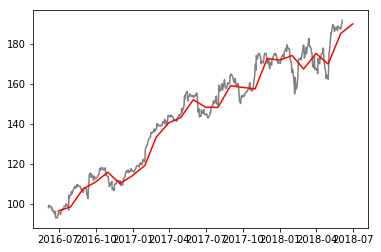

In [65]:
# plotting the opening price 
plt.plot(ts.Open, color = 'grey')
plt.plot(ts.Open.resample('M').mean(), color = 'red')

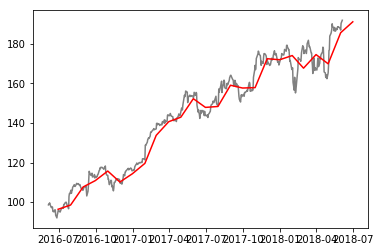

In [66]:
# plotting the closing price 
plt.plot(ts.Close, color = 'grey')
plt.plot(ts.Close.resample('M').mean(), color = 'red')

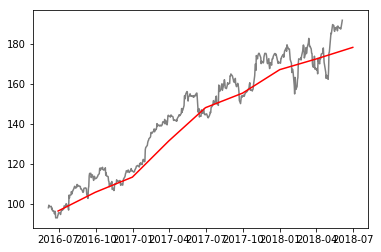

In [67]:
# plotting the quaterly opening price 
plt.plot(ts.Open, color = 'grey')
plt.plot(ts.Open.resample('Q').mean(), color = 'red')

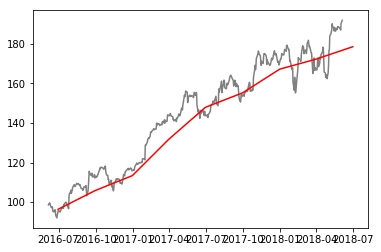

In [70]:
# plotting the quaterly closing price 
plt.plot(ts.Close, color = 'grey')
plt.plot(ts.Close.resample('Q').mean(), color = 'red')

## Date Range

In [74]:
data = pd.read_csv('AAPL.csv', header = 0)
data.shape

(503, 7)

In [76]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
1,2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2,2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
3,2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
4,2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900


In [80]:
# removing the first columns i.e Date from the dataset 
data = data.drop(columns = ['Date'])

In [81]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
1,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
3,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
4,98.529999,99.349998,98.480003,98.830002,95.488617,31712900


In [96]:
# adding a custom date-time index to our dataset
rng = pd.date_range(start = '2016-06-06', freq = 'B', periods = 503 )
len(rng)

503

In [97]:
data = data.set_index(rng, inplace = False)

In [98]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900


In [104]:
# Padding the dataset to fill the empty values of weekend dates
data.asfreq('D', method = 'pad')[:15]

,Open,High,Low,Close,Adj Close,Volume
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-11,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-12,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-13,98.690002,99.120003,97.099998,97.339996,94.048996,38020500
2016-06-14,97.320000,98.480003,96.750000,97.459999,94.164932,31931900
2016-06-15,97.820000,98.410004,97.029999,97.139999,93.855766,29445200


In [105]:
# Setting method to None
data.asfreq('D')[:15]

,Open,High,Low,Close,Adj Close,Volume
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500.0
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500.0
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100.0
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400.0
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900.0
2016-06-11,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,98.690002,99.120003,97.099998,97.339996,94.048996,38020500.0
2016-06-14,97.320000,98.480003,96.750000,97.459999,94.164932,31931900.0
2016-06-15,97.820000,98.410004,97.029999,97.139999,93.855766,29445200.0


In [106]:
# Setting method to "backward fill" - bfill
data.asfreq('D', method = 'bfill')[:15]

,Open,High,Low,Close,Adj Close,Volume
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-11,98.690002,99.120003,97.099998,97.339996,94.048996,38020500
2016-06-12,98.690002,99.120003,97.099998,97.339996,94.048996,38020500
2016-06-13,98.690002,99.120003,97.099998,97.339996,94.048996,38020500
2016-06-14,97.320000,98.480003,96.750000,97.459999,94.164932,31931900
2016-06-15,97.820000,98.410004,97.029999,97.139999,93.855766,29445200


In [107]:
# setting method to "forward fill"- ffill 
data.asfreq('D', method = 'ffill')[:15]

,Open,High,Low,Close,Adj Close,Volume
2016-06-06,97.989998,101.889999,97.550003,98.629997,95.295364,23292500
2016-06-07,99.250000,99.870003,98.959999,99.029999,95.681847,22409500
2016-06-08,99.019997,99.559998,98.680000,98.940002,95.594902,20848100
2016-06-09,98.500000,99.989998,98.459999,99.650002,96.280899,26601400
2016-06-10,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-11,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-12,98.529999,99.349998,98.480003,98.830002,95.488617,31712900
2016-06-13,98.690002,99.120003,97.099998,97.339996,94.048996,38020500
2016-06-14,97.320000,98.480003,96.750000,97.459999,94.164932,31931900
2016-06-15,97.820000,98.410004,97.029999,97.139999,93.855766,29445200


In [109]:
import numpy as np
values = np.random.randint(1,10,len(rng))
len(values)

503

In [116]:
# creating a custom time-series
ts = pd.Series(values, index = rng)
print(ts[:15])
print('Value at date "2016-06-20" is: ',ts['2016-06-20'])

2016-06-06    5
2016-06-07    9
2016-06-08    3
2016-06-09    2
2016-06-10    7
2016-06-13    4
2016-06-14    2
2016-06-15    3
2016-06-16    3
2016-06-17    2
2016-06-20    4
2016-06-21    1
2016-06-22    6
2016-06-23    2
2016-06-24    9
Freq: B, dtype: int64
Value at date "2016-06-20" is:  4


## Handling Holidays with pandas holiday and custom calendar 


In [121]:
dummy_rng = pd.date_range(start = '1st july, 2018', end = '27th july, 2018' , freq = 'B')
dummy_rng[:10]

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13'],
              dtype='datetime64[ns]', freq='B')

In [126]:
# Note that 4th july is a holiday, but it is not incorporated in the default pandas 
# date_range, so we need to specifically add the holidays in our data set

from pandas.tseries.holiday import USFederalHolidayCalendar as ufc
from pandas.tseries.offsets import CustomBusinessDay as cbd

In [128]:
Cust_BsDay = cbd(calendar = ufc())
Cust_BsDay

<CustomBusinessDay>

In [129]:
dummy_rng = pd.date_range(start = '1st july, 2018', end = '27th july, 2018' , freq = Cust_BsDay)
dummy_rng[:10]
## Note that now 4th july is taken into account as a public holiday

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-05', '2018-07-06',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-16'],
              dtype='datetime64[ns]', freq='C')

In [130]:
len(dummy_rng)

19

### Source code of pandas.tseries.holiday
https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py

In [145]:
## Creating a custom calender
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class MyBdayCalendar(AbstractHolidayCalendar):
    """
      The following class contains a custom calendar...
    """
    rules = [
        Holiday('Depu \'s bday', month=7, day=27, observance=nearest_workday)
    ]
    
my_calendar = cbd(calendar = MyBdayCalendar())
my_calendar
        

<CustomBusinessDay>

In [146]:
dummy_rng = pd.date_range(start = '1st july, 2018', end = '30th july, 2018' , freq = my_calendar)
dummy_rng[:10:-1]

# We can notice that it is taking into account 27th july as a holiday

DatetimeIndex(['2018-07-30', '2018-07-26', '2018-07-25', '2018-07-24',
               '2018-07-23', '2018-07-20', '2018-07-19', '2018-07-18',
               '2018-07-17'],
              dtype='datetime64[ns]', freq='-1C')

In [149]:
# custom business day for country like Egypt where the weekends is on Fri & Sat
# weekmask and holidays are the parameters that we need to tune to create a custom holiday
egypt_business_days = cbd(weekmask = 'Sun Mon Tue Wed Thu', holidays = ['2018-07-03'])
dummy_rng = pd.date_range(start = '1st july, 2018', end = '30th july, 2018' , freq = egypt_business_days)
dummy_rng


DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-04', '2018-07-05',
               '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-15', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-22', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-29',
               '2018-07-30'],
              dtype='datetime64[ns]', freq='C')

## Date time 

In [150]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '20170105']

In [152]:
# We can convert the above multiple representation of datetime in a single format
# using the to_datetime funtion in pandas
pd.to_datetime(dates)


DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [154]:
# To handle the european date i.e dd-mm-yyyy
pd.to_datetime('5-1-2017', dayfirst= True)


Timestamp('2017-01-05 00:00:00')

In [157]:
# To handke custom date string
pd.to_datetime('5$1$2017', format = '%d$%m$%Y')

Timestamp('2017-01-05 00:00:00')

In [158]:
dates = ['2017-01-03', 'abc', '03-01-2017']
dt = pd.to_datetime(dates, errors = 'raise')
dt
# We see that pandas will throw an error as follows

ValueError: Unknown string format

In [160]:
#  the errors are ignored
dates = ['2017-01-03', 'abc', '03-01-2017']
dt = pd.to_datetime(dates, errors = 'ignore')
dt

array(['2017-01-03', 'abc', '03-01-2017'], dtype=object)

In [161]:
# the error is supressed to not a datetime
dates = ['2017-01-03', 'abc', '03-01-2017']
dt = pd.to_datetime(dates, errors = 'coerce')
dt

DatetimeIndex(['2017-01-03', 'NaT', '2017-03-01'], dtype='datetime64[ns]', freq=None)

In [163]:
# dealing with unix epoch time
t = 1501356749  # unix epoch version of 07/29/2017
dt = pd.to_datetime([t], unit = 's')  # note that the unit = sec and not nano-sec
dt

DatetimeIndex(['2017-07-29 19:32:29'], dtype='datetime64[ns]', freq=None)

In [164]:
dt.view('int64') # back to epoch

array([1501356749000000000])

## TimeStamp, Period & Period Index

In [165]:
year = pd.Period('2018')
year

Period('2018', 'A-DEC')

In [166]:
dir(year)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_add_delta',
 '_comparables',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [167]:
year.start_time

Timestamp('2018-01-01 00:00:00')

In [168]:
year.end_time

Timestamp('2018-12-31 23:59:59.999999999')

In [171]:
month = pd.Period('2018-01', freq = 'M')

In [172]:
month.start_time

Timestamp('2018-01-01 00:00:00')

In [173]:
month.end_time

Timestamp('2018-01-31 23:59:59.999999999')

In [177]:
month.end_time.quarter  # as the end_time is 31st jan 

1